# 4 Basic Visualizations

First, you will create some basic visualizations of the MovieLens dataset described above. Using a method (e.g. histograms) of your choice, visualize the following:
1. All ratings in the MovieLens Dataset.
2. All ratings of the ten most popular movies (movies which have received the most ratings).
3. All ratings of the ten best movies (movies with the highest average ratings).
4. All ratings of movies from three genres of your choice (create three separate visualizations).
Note that in Parts 2 and 3 you only need to make one combined histogram for the ten most popular
movies and one combined histogram for the ten best movies.

In [1]:
import sys
sys.path.append('..')

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from src import utils

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
df_data = utils.load_data()
df_train = utils.load_train_data()
df_test = utils.load_test_data()
df_movies = utils.load_movies()

# Bins for histograms. This is custom so that each bar is centered at integers.
bins = np.arange(min(df_data.rating) - 1, max(df_data.rating) + 1) + 0.5

### 1. All ratings in the MovieLens Dataset.

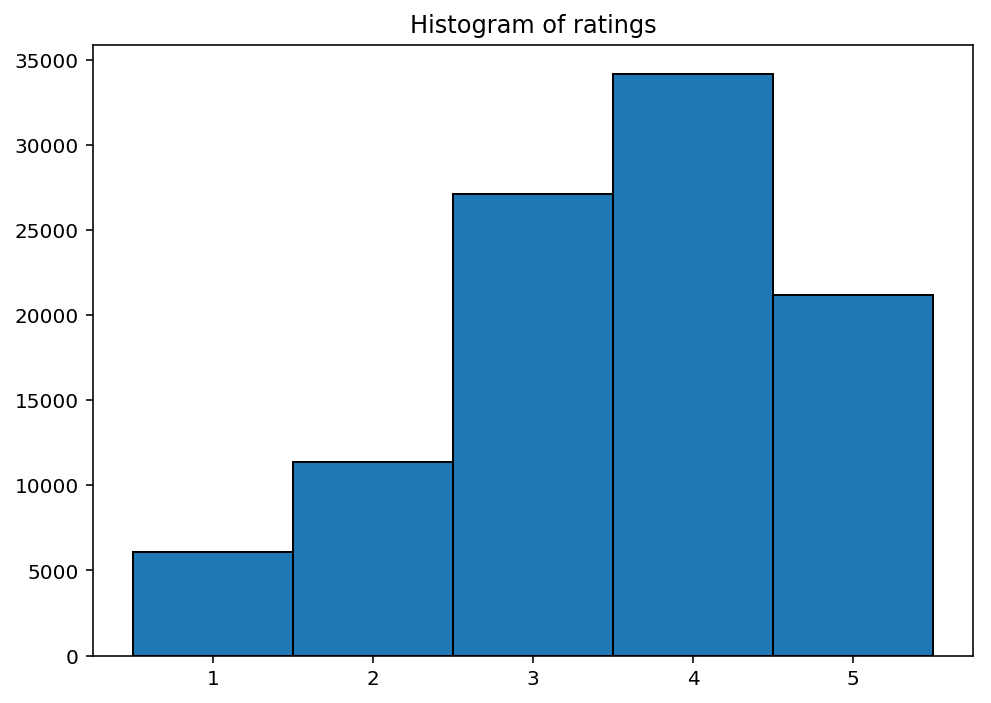

In [11]:
fig, ax = plt.subplots(figsize=(7, 5))
ax.hist(df_data.rating, bins=bins, edgecolor='black')
ax.set_title('Histogram of ratings')
fig.tight_layout()
utils.save_fig(fig, '4_1.png')

### 2. All ratings of the ten most popular movies (movies which have received the most ratings).

In [6]:
# Get movie_id of movies with top 10 most ratings
popular = df_data.movie_id.value_counts().sort_values(ascending=False)[:10].index.values

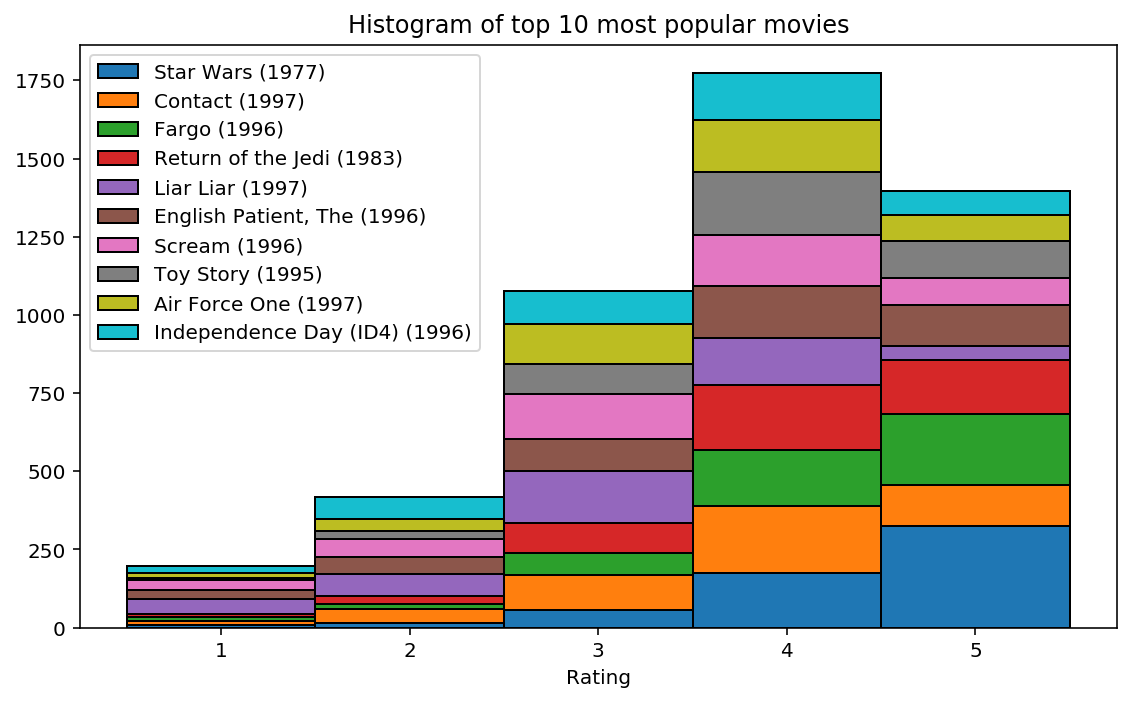

In [8]:
fig, ax = plt.subplots(figsize=(8, 5))

titles = []
ratings = []
for movie_id in popular:
    title = df_movies[df_movies.movie_id == movie_id].title.values[0]
    rating = df_data[df_data.movie_id == movie_id].rating.values
    titles.append(title)
    ratings.append(rating)

ax.hist(ratings, stacked=True, bins=bins, edgecolor='black')
ax.legend(titles)
ax.set_xlabel('Rating')
ax.set_title('Histogram of top 10 most popular movies')
fig.tight_layout()
utils.save_fig(fig, '4_2_stacked.png')

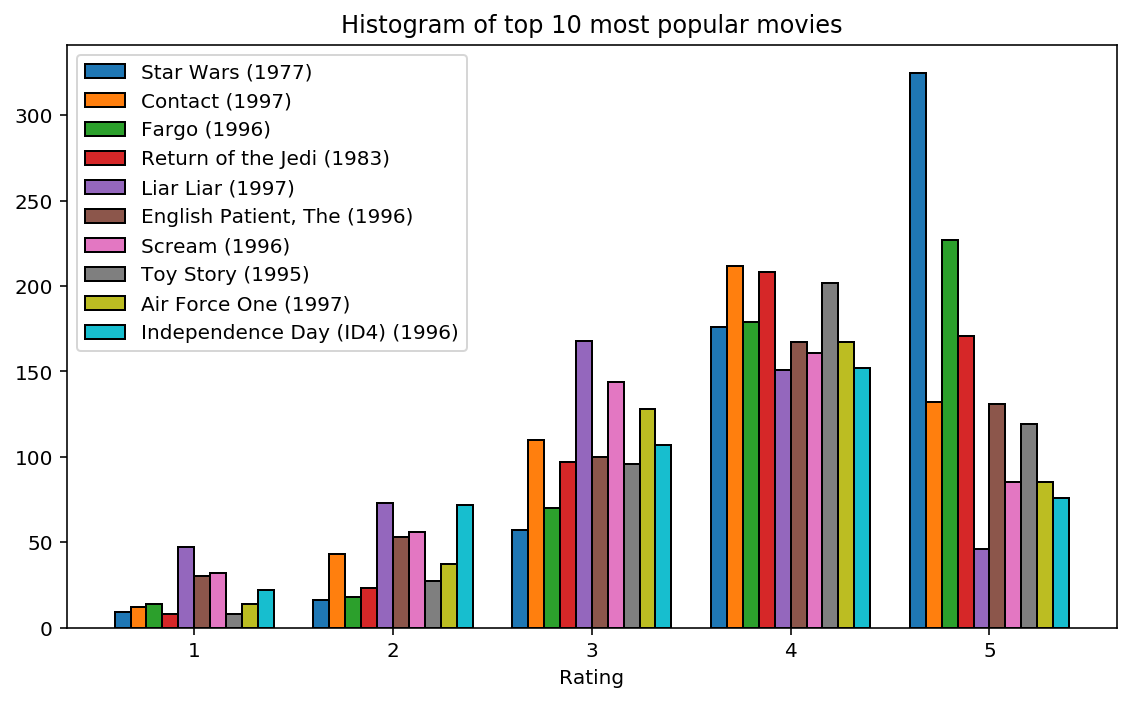

In [12]:
fig, ax = plt.subplots(figsize=(8, 5))

titles = []
ratings = []
for movie_id in popular:
    title = df_movies[df_movies.movie_id == movie_id].title.values[0]
    rating = df_data[df_data.movie_id == movie_id].rating.values
    titles.append(title)
    ratings.append(rating)

ax.hist(ratings, stacked=False, bins=bins, edgecolor='black')
ax.legend(titles)
ax.set_xlabel('Rating')
ax.set_title('Histogram of top 10 most popular movies')
fig.tight_layout()
utils.save_fig(fig, '4_2.png')

### 3. All ratings of the ten best movies (movies with the highest average ratings).

In [10]:
# Get movie_id of movies with top 10 average ratings
best = df_data[['movie_id', 'rating']].groupby('movie_id').mean().sort_values('rating', ascending=False)[:10].index.values

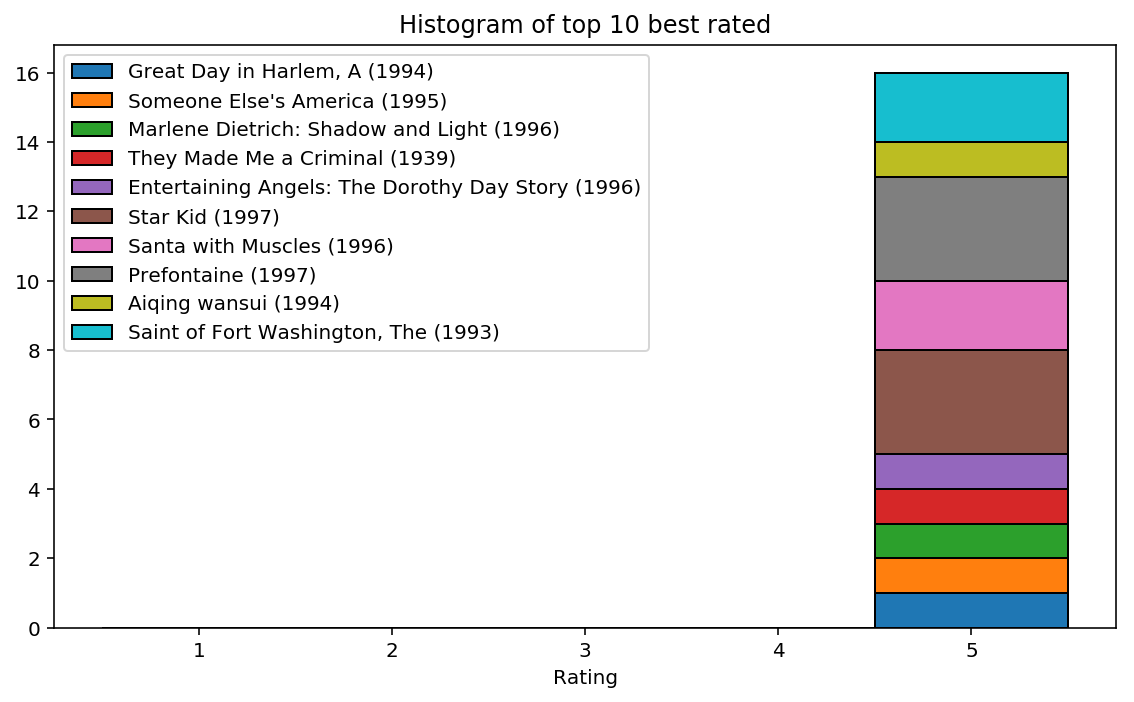

In [13]:
fig, ax = plt.subplots(figsize=(8, 5))

titles = []
ratings = []
for movie_id in best:
    title = df_movies[df_movies.movie_id == movie_id].title.values[0]
    rating = df_data[df_data.movie_id == movie_id].rating.values
    titles.append(title)
    ratings.append(rating)
    
ax.hist(ratings, stacked=True, bins=bins, edgecolor='black')
ax.legend(titles)
ax.set_xlabel('Rating')
ax.set_title('Histogram of top 10 best rated')
fig.tight_layout()
utils.save_fig(fig, '4_3.png')

### 4. All ratings of movies from three genres of your choice (create three separate visualizations). Note that in Parts 2 and 3 you only need to make one combined histogram for the ten most popular movies and one combined histogram for the ten best movies.

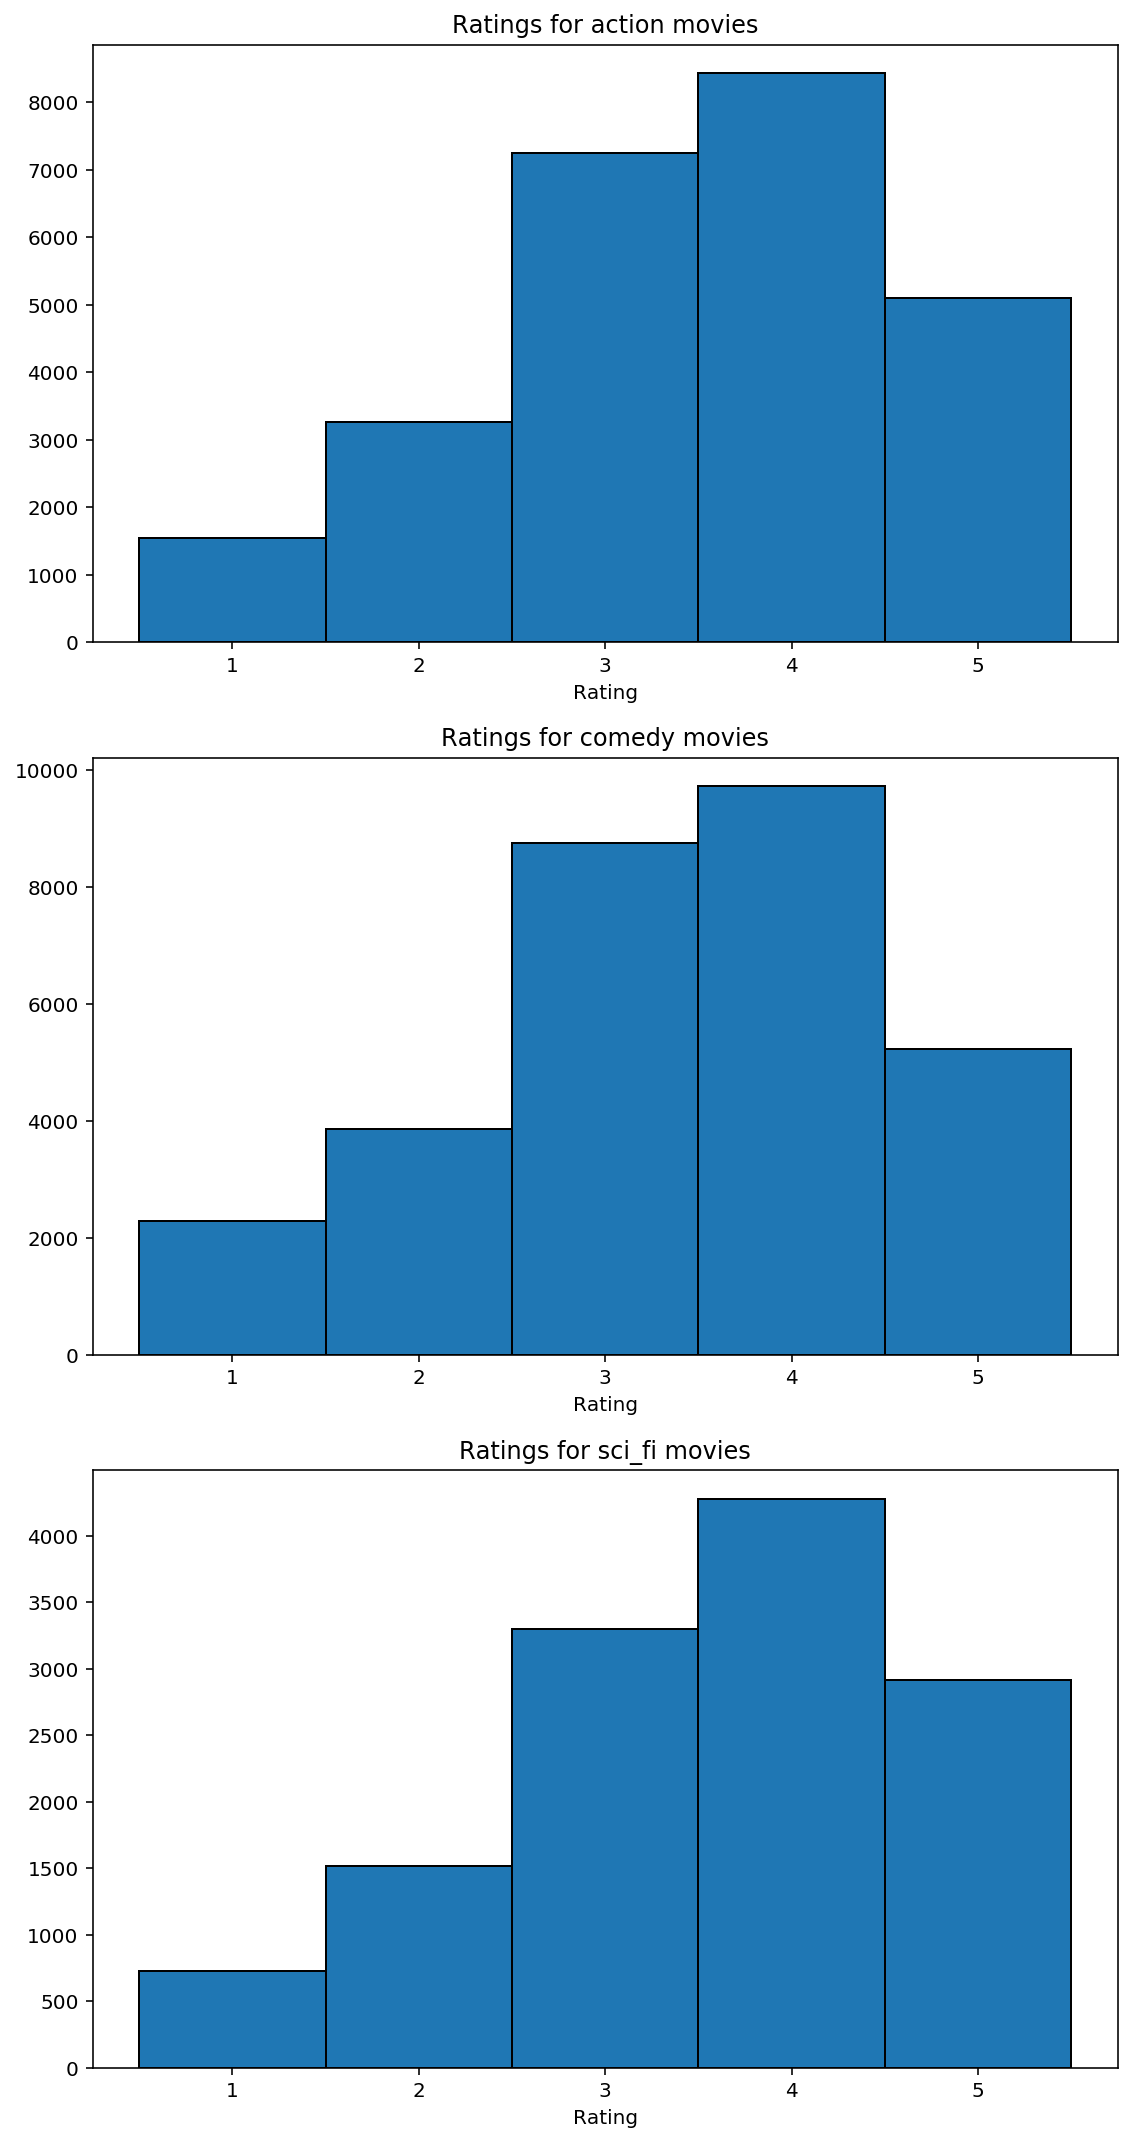

In [14]:
genres = ['action', 'comedy', 'sci_fi']

fig, axes = plt.subplots(nrows=len(genres), figsize=(8, 5 * len(genres)))
for genre, ax in zip(genres, axes):
    # Get movie_id of movies in this genre
    movie_ids = df_movies[df_movies[genre] == 1].movie_id.values
    ratings = df_data[df_data.movie_id.isin(movie_ids)].rating.values
    ax.hist(ratings, bins=bins, edgecolor='black')
    ax.set_xlabel('Rating')
    ax.set_title(f'Ratings for {genre} movies')
fig.tight_layout()
utils.save_fig(fig, '4_4.png')